In [22]:
import numpy as np
from numpy import sum as arraysum
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [108]:
df=pd.read_csv("Z:\Tech Development\Tech Development projects\EM-089 Application Of Arrhenius Equation - for HbA1c products\July\ASLT_4211a.csv")
df2=pd.read_csv("Z:\Tech Development\Tech Development projects\EM-089 Application Of Arrhenius Equation - for HbA1c products\July\ASLT_4211b.csv")

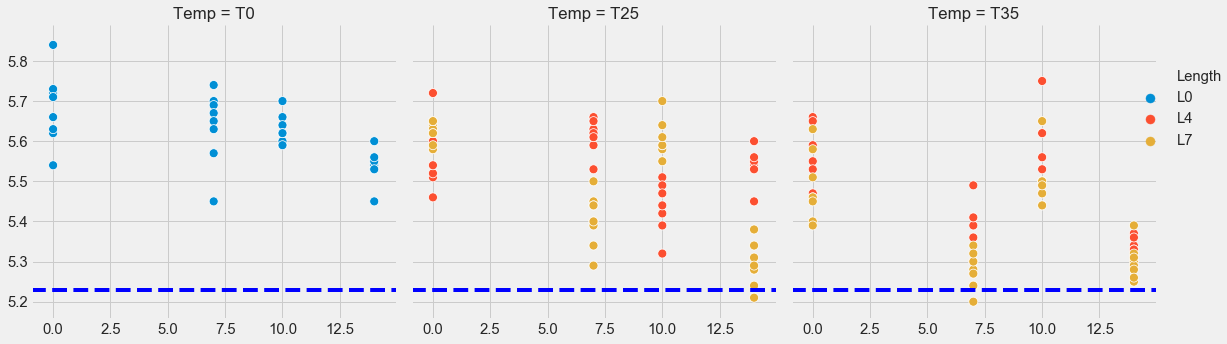

In [19]:
sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_context('talk', font_scale=0.9) 
sns.set_style('ticks')
plt.style.use('fivethirtyeight')
g=sns.relplot(data=df, x='Day', y='Conc',col='Temp', hue='Length')
g.set_xlabels("Day",fontweight='bold', size=8)
g.set_ylabels("HbA1c Levels",fontweight='bold', size=10)
leg = g._legend
leg.set_bbox_to_anchor([1,0.8])
leg._loc = 9  # if required you can set the loc
g.map(plt.axhline, y=5.23, ls="--", c="blue")
g.savefig("4211_14HC")
sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_context('talk', font_scale=1) 
sns.set_style('ticks')
g.savefig("4211_14LC")

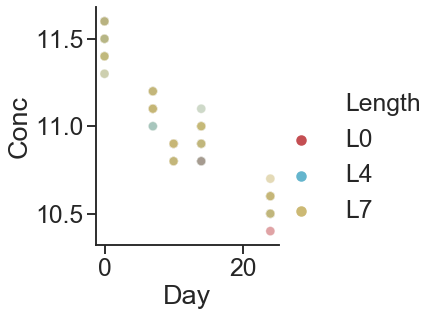

In [31]:
sns.relplot(x="Day", y="Conc", hue="Length",alpha=0.3,
              palette=["r", "c", "y"], data=df);

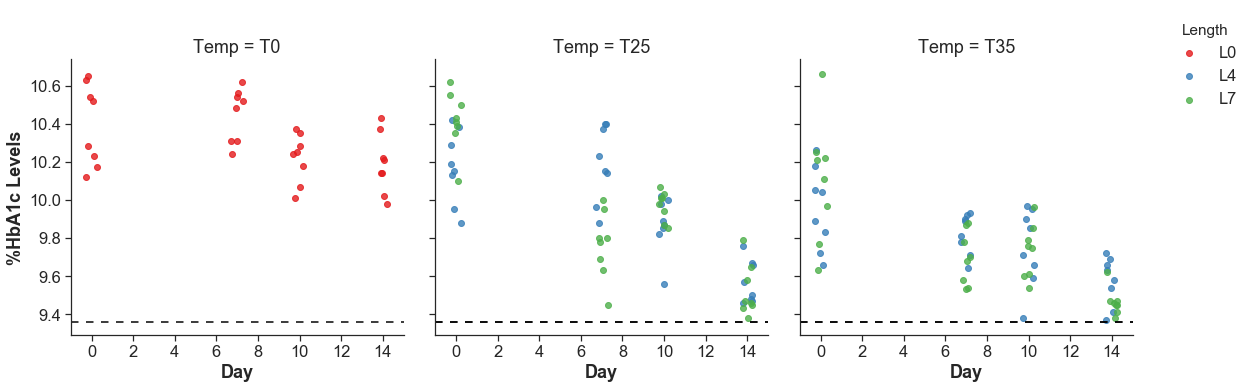

In [118]:
sns.set(style="ticks", color_codes=True, font_scale =1.5)
g = sns.FacetGrid(df, col="Temp",  col_wrap=3, hue='Length', height=5, palette="Set1")
g = g.map(sns.regplot, "Day", "Conc", fit_reg=False, x_jitter=0.3).add_legend()
leg = g._legend
leg.set_bbox_to_anchor([1,0.9])
leg._loc = 6
g.map(plt.axhline, y=9.36, ls=(0, (5, 5)), c="black")
sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_style('white')
sns.despine()
g.set(xlim=(-1,15), xticks=[0,2,4,6,8,10,12,14])
g.set_xlabels("Day",fontweight='bold', size=18)
g.set_ylabels("%HbA1c Levels",fontweight='bold', size=18)
g.savefig("70972_wrap");

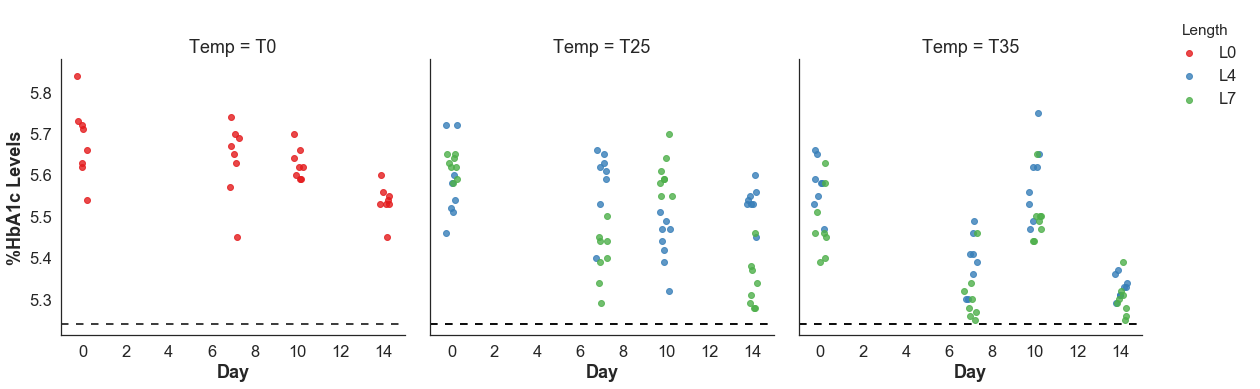

In [119]:
sns.set(style="white", color_codes=True, font_scale =1.5)
g = sns.FacetGrid(df2, col="Temp",  col_wrap=3, hue='Length', height=5, palette="Set1")
g = g.map(sns.regplot, "Day", "Conc", fit_reg=False, x_jitter=0.3).add_legend()
leg = g._legend
leg.set_bbox_to_anchor([1,0.9])
leg._loc = 6
g.map(plt.axhline, y=5.24, ls=(0, (5, 5)), c="black")
sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_context('talk', font_scale=1.0) 
sns.set_style('white')
sns.despine()
g.set(xlim=(-1,15), xticks=[0,2,4,6,8,10,12,14])
g.set_xlabels("Day",fontweight='bold', size=18)
g.set_ylabels("%HbA1c Levels",fontweight='bold', size=18)
g.savefig("70971_wrap");

In [120]:
model = ols('Conc ~ C(Day)+C(Length)+C(Temp)', data=df2).fit()

In [121]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Day),0.801635,3.0,34.254784,5.390803e-17
C(Length),0.655684,2.0,42.027180,2.838092e-15
C(Temp),0.750343,2.0,48.094536,6.229119e-17
Residual,1.193509,153.0,NaN,NaN


In [37]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Conc   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     16.64
Date:                Wed, 02 Sep 2020   Prob (F-statistic):           1.07e-20
Time:                        15:51:23   Log-Likelihood:                 141.18
No. Observations:                 120   AIC:                            -252.4
Df Residuals:                     105   BIC:                            -210.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------